In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set Up Paths

In [11]:
import os

# Define your base data directories
base_dir = '/content/drive/MyDrive/CAI_NTERNSHAIP'
defect_dir = os.path.join(base_dir, 'DEFECT IMAGES')
nondefect_dir = os.path.join(base_dir, 'NON DEFECT')

# Check paths in case of typos (print for debugging)
print('DEFECT:', defect_dir)
print('NON DEFECT:', nondefect_dir)


DEFECT: /content/drive/MyDrive/CAI_NTERNSHAIP/DEFECT IMAGES
NON DEFECT: /content/drive/MyDrive/CAI_NTERNSHAIP/NON DEFECT


## 2. Create a Combined Dataset Directory for ImageFolder


In [13]:
import shutil

root_imgfolder = '/content/dataset_imgfolder'
os.makedirs(root_imgfolder, exist_ok=True)

defect_target = os.path.join(root_imgfolder, 'defective')
nondefect_target = os.path.join(root_imgfolder, 'non_defective')

os.makedirs(defect_target, exist_ok=True)
os.makedirs(nondefect_target, exist_ok=True)

# Copy images (skip if already done)
for src_dir, dst_dir in [(defect_dir, defect_target), (nondefect_dir, nondefect_target)]:
    for f in os.listdir(src_dir):
        src_path = os.path.join(src_dir, f)
        dst_path = os.path.join(dst_dir, f)
        if os.path.isfile(src_path) and not os.path.exists(dst_path):
            shutil.copy2(src_path, dst_path)


## Load the Dataset with torchvision.ImageFolder

In [14]:
from torchvision import datasets, transforms

# Basic transforms -- you can add augmentations later
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root_imgfolder, transform=basic_transform)
print('Classes:', dataset.classes)
print('Total images:', len(dataset))

# List few sample paths and labels for debugging
for i in range(3):
    img, label = dataset[i]
    print(f'Index {i}: Label={dataset.classes[label]} - Shape={img.shape}')


Classes: ['defective', 'non_defective']
Total images: 62
Index 0: Label=defective - Shape=torch.Size([3, 224, 224])
Index 1: Label=defective - Shape=torch.Size([3, 224, 224])
Index 2: Label=defective - Shape=torch.Size([3, 224, 224])


## 4. DataLoader for Batches



In [15]:
from torch.utils.data import DataLoader

batch_size = 8
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Get a sample batch and display
batch = next(iter(dataloader))
images, labels = batch
print("Loaded batch shape:", images.shape, labels)


Loaded batch shape: torch.Size([8, 3, 224, 224]) tensor([1, 1, 0, 1, 1, 1, 1, 1])


## 5. Visualize Samples


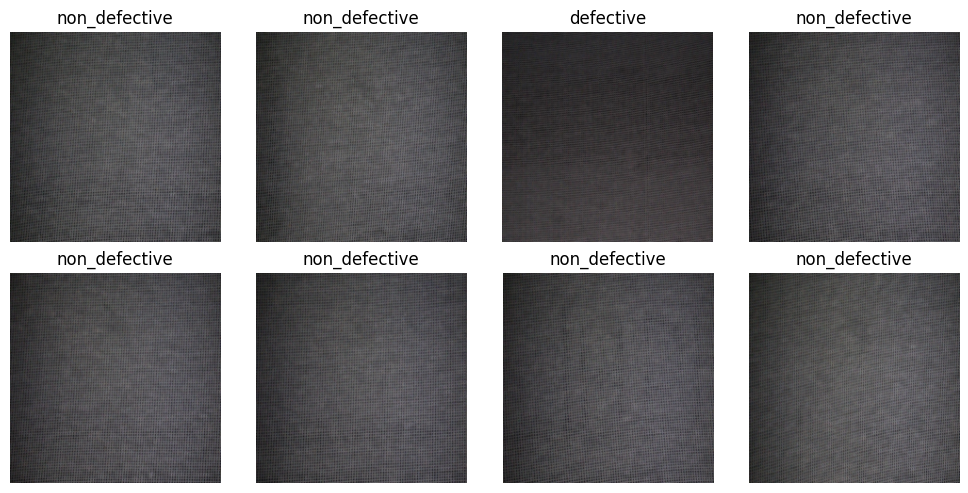

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def show_batch(images, labels, class_names):
    plt.figure(figsize=(10,5))
    for i in range(min(len(images), 8)):
        plt.subplot(2,4,i+1)
        img = images[i].permute(1,2,0).numpy()
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_batch(images, labels, dataset.classes)


In [17]:
import os
import shutil
import random

# Paths
base_path = "/content/drive/MyDrive/CAI_NTERNSHAIP"
defect_path = os.path.join(base_path, "DEFECT IMAGES")
nondefect_path = os.path.join(base_path, "NON DEFECT")

# Output dataset path (in Drive)
output_path = "/content/drive/MyDrive/CAI_NTERNSHAIP/processed_data"
train_defect = os.path.join(output_path, "train/defective")
train_nondefect = os.path.join(output_path, "train/non_defective")
val_defect = os.path.join(output_path, "val/defective")
val_nondefect = os.path.join(output_path, "val/non_defective")

# Create directories
for path in [train_defect, train_nondefect, val_defect, val_nondefect]:
    os.makedirs(path, exist_ok=True)

def split_and_copy(src_folder, train_folder, val_folder, split=0.8):
    images = [f for f in os.listdir(src_folder) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    random.shuffle(images)
    split_idx = int(len(images) * split)

    train_imgs = images[:split_idx]
    val_imgs = images[split_idx:]

    # Copy training images
    for img in train_imgs:
        shutil.copy(os.path.join(src_folder, img), os.path.join(train_folder, img))

    # Copy validation images
    for img in val_imgs:
        shutil.copy(os.path.join(src_folder, img), os.path.join(val_folder, img))

# Process both classes
split_and_copy(defect_path, train_defect, val_defect)
split_and_copy(nondefect_path, train_nondefect, val_nondefect)

print("✅ Dataset restructuring complete! Saved in:", output_path)


✅ Dataset restructuring complete! Saved in: /content/drive/MyDrive/CAI_NTERNSHAIP/processed_data


Classes: ['defective', 'non_defective']
Epoch 1/20 - Train Acc: 0.6290 | Val Acc: 0.7838
Epoch 2/20 - Train Acc: 1.0000 | Val Acc: 0.8919
Epoch 3/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 4/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 5/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 6/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 7/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 8/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 9/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 10/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 11/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 12/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 13/20 - Train Acc: 1.0000 | Val Acc: 1.0000
Epoch 14/20 - Train Acc: 0.9355 | Val Acc: 1.0000
Epoch 15/20 - Train Acc: 1.0000 | Val Acc: 0.9459
Epoch 16/20 - Train Acc: 1.0000 | Val Acc: 0.7838
Epoch 17/20 - Train Acc: 0.9516 | Val Acc: 0.7838
Epoch 18/20 - Train Acc: 1.0000 | Val Acc: 0.8649
Epoch 19/20 - Train Acc: 1.0000 | Val Acc: 0.8649
Epoch 20/20 - Train

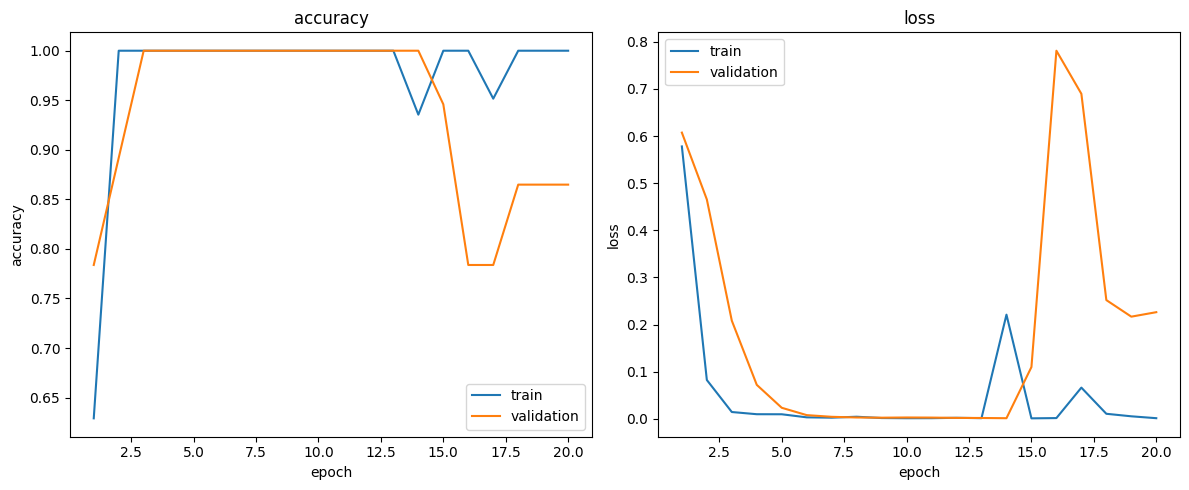


=== FINAL METRICS ===
Final Train Accuracy: 1.0000
Final Val Accuracy: 0.8649
Final Train Loss: 0.0012
Final Val Loss: 0.2262


In [18]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt

# === CONFIG ===
DATA_DIR = "/content/drive/MyDrive/CAI_NTERNSHAIP/processed_data"
BATCH_SIZE = 16
NUM_EPOCHS = 20
LR = 1e-4
IMG_SIZE = 224
VAL_SPLIT = 0.2

# === DATA AUGMENTATION ===
base_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

defective_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.7),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

val_transform = base_transform

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, defective_class_idx=0):
        self.dataset = dataset
        self.defective_class_idx = defective_class_idx

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        path, label = self.dataset.samples[idx]
        img = self.dataset.loader(path)
        if label == self.defective_class_idx:
            img = defective_transform(img)
        else:
            img = base_transform(img)
        return img, label

def get_datasets(data_dir):
    train_path = os.path.join(data_dir, 'train')
    val_path = os.path.join(data_dir, 'val')

    if os.path.isdir(val_path):
        train_ds_raw = datasets.ImageFolder(train_path)
        val_ds = datasets.ImageFolder(val_path, transform=val_transform)
    else:
        full_ds = datasets.ImageFolder(train_path)
        val_len = int(VAL_SPLIT * len(full_ds))
        train_len = len(full_ds) - val_len
        train_ds_raw, val_ds_raw = random_split(full_ds, [train_len, val_len])
        val_ds_raw.dataset.transform = val_transform
        train_ds_raw = train_ds_raw.dataset
        val_ds = val_ds_raw.dataset

    class_to_idx = train_ds_raw.class_to_idx
    defective_idx = class_to_idx.get("defective", 0)
    train_ds = CustomDataset(train_ds_raw, defective_class_idx=defective_idx)
    return train_ds, val_ds, class_to_idx

train_dataset, val_dataset, class_to_idx = get_datasets(DATA_DIR)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
class_names = list(class_to_idx.keys())
print("Classes:", class_names)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

train_accuracies, val_accuracies = [], []
train_losses, val_losses = [], []

for epoch in range(NUM_EPOCHS):
    # TRAIN
    model.train()
    running_loss, running_corrects = 0.0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_corrects += (outputs.argmax(1) == labels).sum().item()
    train_loss = running_loss / len(train_loader.dataset)
    train_acc = running_corrects / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # VALIDATE
    model.eval()
    running_loss, running_corrects = 0.0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += (outputs.argmax(1) == labels).sum().item()
    val_loss = running_loss / len(val_loader.dataset)
    val_acc = running_corrects / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{NUM_EPOCHS} - Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}')

# Plotting after training
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(1, NUM_EPOCHS+1), train_accuracies, label='train')
axs[0].plot(range(1, NUM_EPOCHS+1), val_accuracies, label='validation')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')
axs[0].legend()

axs[1].plot(range(1, NUM_EPOCHS+1), train_losses, label='train')
axs[1].plot(range(1, NUM_EPOCHS+1), val_losses, label='validation')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].set_title('loss')
axs[1].legend()

plt.tight_layout()
plt.show()

print("\n=== FINAL METRICS ===")
print(f'Final Train Accuracy: {train_accuracies[-1]:.4f}')
print(f'Final Val Accuracy: {val_accuracies[-1]:.4f}')
print(f'Final Train Loss: {train_losses[-1]:.4f}')
print(f'Final Val Loss: {val_losses[-1]:.4f}')

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import KFold
from torch.utils.data import Subset, DataLoader

# ---------- PART 1: EVALUATE ON VAL SET ----------
def evaluate_model(model, dataloader, device, class_names):
    model.eval()
    all_labels, all_preds = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted')
    rec = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print("Validation/Test Set Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))
    print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))

    return acc, prec, rec, f1

# Example usage:
# evaluate_model(model, val_loader, device, class_names=['defective','non_defective'])


# ---------- PART 2: K-FOLD CROSS VALIDATION ----------
def cross_validate(model_class, dataset, k=5, batch_size=8, epochs=10, lr=1e-3, device="cuda" if torch.cuda.is_available() else "cpu", class_names=None):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    all_metrics = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
        print(f"\n===== Fold {fold+1}/{k} =====")

        # Prepare subsets
        train_subset = Subset(dataset, train_idx)
        val_subset = Subset(dataset, val_idx)

        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

        # Re-initialize model for each fold
        model = model_class().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        # Training loop
        for epoch in range(epochs):
            model.train()
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Evaluate
        acc, prec, rec, f1 = evaluate_model(model, val_loader, device, class_names)
        all_metrics.append([acc, prec, rec, f1])

    all_metrics = np.array(all_metrics)
    print("\n===== Cross-validation Results =====")
    print("Mean Accuracy:", np.mean(all_metrics[:,0]))
    print("Mean Precision:", np.mean(all_metrics[:,1]))
    print("Mean Recall:", np.mean(all_metrics[:,2]))
    print("Mean F1:", np.mean(all_metrics[:,3]))
    return all_metrics


In [20]:
# Example: evaluate using your val_loader
print("🔍 Evaluating on validation set as test data...")
evaluate_model(model, val_loader, device, ['defective', 'non_defective'])


🔍 Evaluating on validation set as test data...
Validation/Test Set Metrics:
Accuracy: 0.8649
Precision: 0.8847
Recall: 0.8649
F1-score: 0.8395

Classification Report:
                precision    recall  f1-score   support

    defective       1.00      0.38      0.55         8
non_defective       0.85      1.00      0.92        29

     accuracy                           0.86        37
    macro avg       0.93      0.69      0.73        37
 weighted avg       0.88      0.86      0.84        37

Confusion Matrix:
 [[ 3  5]
 [ 0 29]]


(0.8648648648648649,
 0.8847376788553258,
 0.8648648648648649,
 0.8395148395148394)

In [21]:
print("🔄 Running 5-Fold Cross Validation...")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 64) # Assuming 224x224 input after pooling
        self.fc2 = nn.Linear(64, 2) # 2 output classes

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


cross_validate(
    model_class=SimpleCNN,   # now defined
    dataset=train_dataset,         # use the combined dataset
    k=5,
    batch_size=8,
    epochs=5,
    lr=1e-3,
    device=device,
    class_names=['defective', 'non_defective']
)

🔄 Running 5-Fold Cross Validation...

===== Fold 1/5 =====
Validation/Test Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
                precision    recall  f1-score   support

    defective       1.00      1.00      1.00         3
non_defective       1.00      1.00      1.00        10

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00      1.00      1.00        13

Confusion Matrix:
 [[ 3  0]
 [ 0 10]]

===== Fold 2/5 =====
Validation/Test Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
                precision    recall  f1-score   support

    defective       1.00      1.00      1.00         4
non_defective       1.00      1.00      1.00         9

     accuracy                           1.00        13
    macro avg       1.00      1.00      1.00        13
 weighted avg       1.00     

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])